In [1]:
import h2o
from h2o.automl import H2OAutoML

In [2]:
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
  Java Version: java version "1.8.0_241"; Java(TM) SE Runtime Environment (build 1.8.0_241-b07); Java HotSpot(TM) 64-Bit Server VM (build 25.241-b07, mixed mode)
  Starting server from /Users/tomasfryda/sources/h2o-3/h2o-py/h2o/backend/bin/h2o.jar
  Ice root: /var/folders/49/kh67vvnj633ftt08t8zfwsvh0000gn/T/tmp19c2k9wi
  JVM stdout: /var/folders/49/kh67vvnj633ftt08t8zfwsvh0000gn/T/tmp19c2k9wi/h2o_tomasfryda_started_from_python.out
  JVM stderr: /var/folders/49/kh67vvnj633ftt08t8zfwsvh0000gn/T/tmp19c2k9wi/h2o_tomasfryda_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,02 secs
H2O_cluster_timezone:,Europe/Prague
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.33.1.99999
H2O_cluster_version_age:,38 minutes
H2O_cluster_name:,H2O_from_python_tomasfryda_s3cfwf
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.556 Gb
H2O_cluster_total_cores:,16
H2O_cluster_allowed_cores:,16
H2O_cluster_status:,"locked, healthy"


In [3]:
df = h2o.import_file("https://h2o-public-test-data.s3.amazonaws.com/smalldata/wine/winequality-redwhite-no-BOM.csv")

response = "quality"

predictors = [
  "fixed acidity", "volatile acidity", "citric acid", "residual sugar", "chlorides", "free sulfur dioxide",
  "total sulfur dioxide", "density", "pH", "sulphates", "alcohol",  "type"
]


train, test = df.split_frame(seed=1)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [4]:
aml = H2OAutoML(max_runtime_secs=120, seed=1)
aml.train(x=predictors, y=response, training_frame=train)

AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%
Model Details
H2OStackedEnsembleEstimator :  Stacked Ensemble
Model Key:  StackedEnsemble_AllModels_AutoML_1_20210827_111859

No model summary for this model

ModelMetricsRegressionGLM: stackedensemble
** Reported on train data. **

MSE: 0.0332776106350334
RMSE: 0.18242151911173582
MAE: 0.13233825750191236
RMSLE: 0.027793141629861674
R^2: 0.9566847646280607
Mean Residual Deviance: 0.0332776106350334
Null degrees of freedom: 4864
Residual degrees of freedom: 4854
Null deviance: 3737.612744090442
Residual deviance: 161.8955757394375
AIC: -2724.6928667700668

ModelMetricsRegressionGLM: stackedensemble
** Reported on cross-validation data. **

MSE: 0.3793586245590936
RMSE: 0.6159209564214336
MAE: 0.4365903327145902
RMSLE: 0.09329242160355951
R^2: 0.5062143044653187
Mean Residual Deviance: 0.3793586245590936
Null degrees of freedom: 4864
Residual degrees of freedom: 4855
Null deviance: 3739.707473

# Leaderboard

> Leaderboard shows models with their metrics. When provided with H2OAutoML object, the leaderboard shows 5-fold cross-validated metrics by default (depending on the H2OAutoML settings), otherwise it shows metrics computed on the frame. At most 20 models are shown by default.

model_id,mean_residual_deviance,rmse,mse,mae,rmsle,training_time_ms,predict_time_per_row_ms,algo
StackedEnsemble_AllModels_AutoML_1_20210827_111859,0.379359,0.615921,0.379359,0.43659,0.0932924,484,0.029982,StackedEnsemble
StackedEnsemble_BestOfFamily_AutoML_1_20210827_111859,0.382806,0.618713,0.382806,0.44203,0.0937151,398,0.008975,StackedEnsemble
XRT_1_AutoML_1_20210827_111859,0.391362,0.62559,0.391362,0.454756,0.0949069,793,0.003966,DRF
DRF_1_AutoML_1_20210827_111859,0.394649,0.628211,0.394649,0.455099,0.095209,452,0.003137,DRF
GBM_4_AutoML_1_20210827_111859,0.415845,0.64486,0.415845,0.484437,0.0975089,463,0.005231,GBM
GBM_grid__1_AutoML_1_20210827_111859_model_6,0.416076,0.64504,0.416076,0.483094,0.0975168,686,0.006324,GBM
GBM_grid__1_AutoML_1_20210827_111859_model_9,0.421898,0.649537,0.421898,0.495109,0.0979614,455,0.0056,GBM
GBM_grid__1_AutoML_1_20210827_111859_model_5,0.425136,0.652025,0.425136,0.492624,0.0984345,828,0.008269,GBM
GBM_grid__1_AutoML_1_20210827_111859_model_2,0.42584,0.652564,0.42584,0.496592,0.098584,425,0.005447,GBM
GBM_3_AutoML_1_20210827_111859,0.428168,0.654346,0.428168,0.497377,0.0989008,416,0.005314,GBM


# Residual Analysis

> Residual Analysis plots the fitted values vs residuals on a test dataset. Ideally, residuals should be randomly distributed. Patterns in this plot can indicate potential problems with the model selection, e.g., using simpler model than necessary, not accounting for heteroscedasticity, autocorrelation, etc. Note that if you see "striped" lines of residuals, that is an artifact of having an integer valued (vs a real valued) response variable.

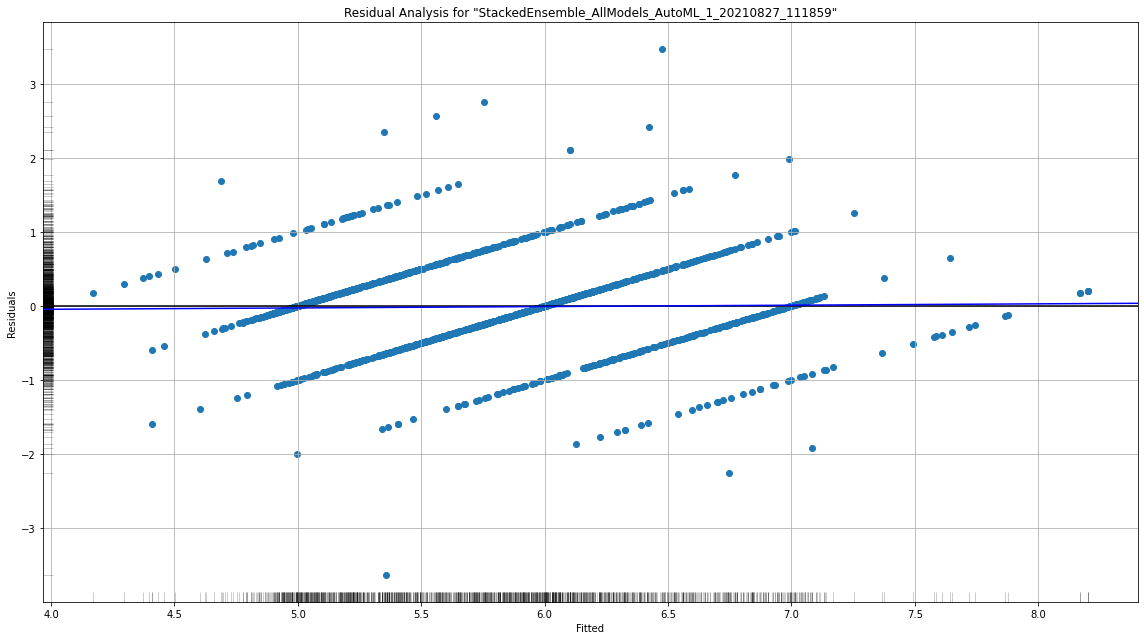

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

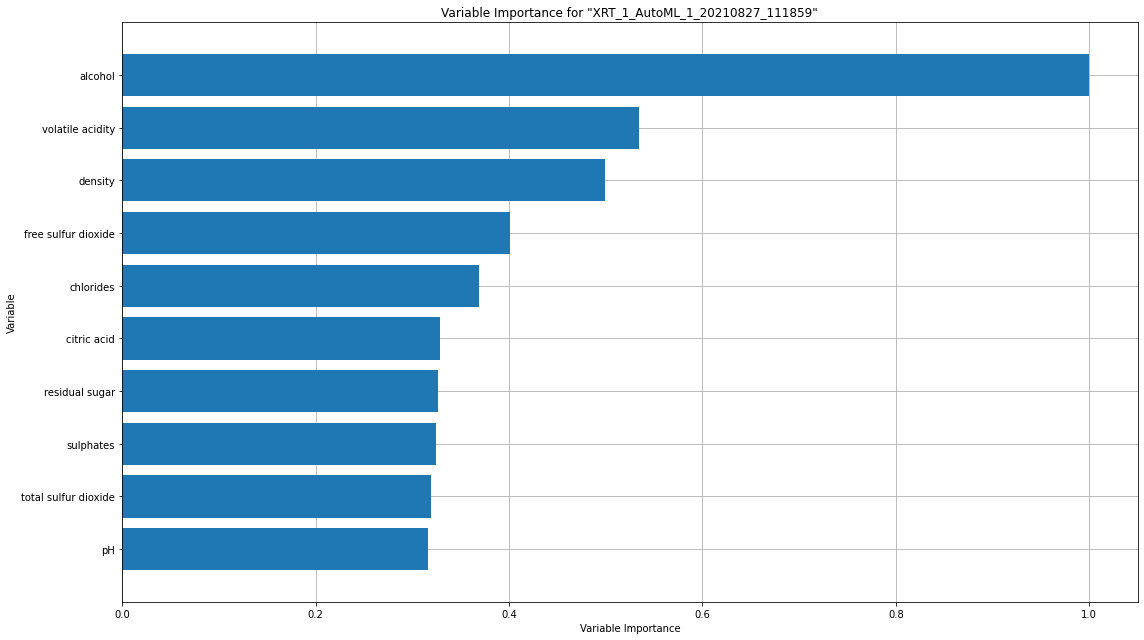

# Variable Importance Heatmap

> Variable importance heatmap shows variable importance across multiple models. Some models in H2O return variable importance for one-hot (binary indicator) encoded versions of categorical columns (e.g. Deep Learning, XGBoost). In order for the variable importance of categorical columns to be compared across all model types we compute a summarization of the the variable importance across all one-hot encoded features and return a single variable importance for the original categorical feature. By default, the models and variables are ordered by their similarity.

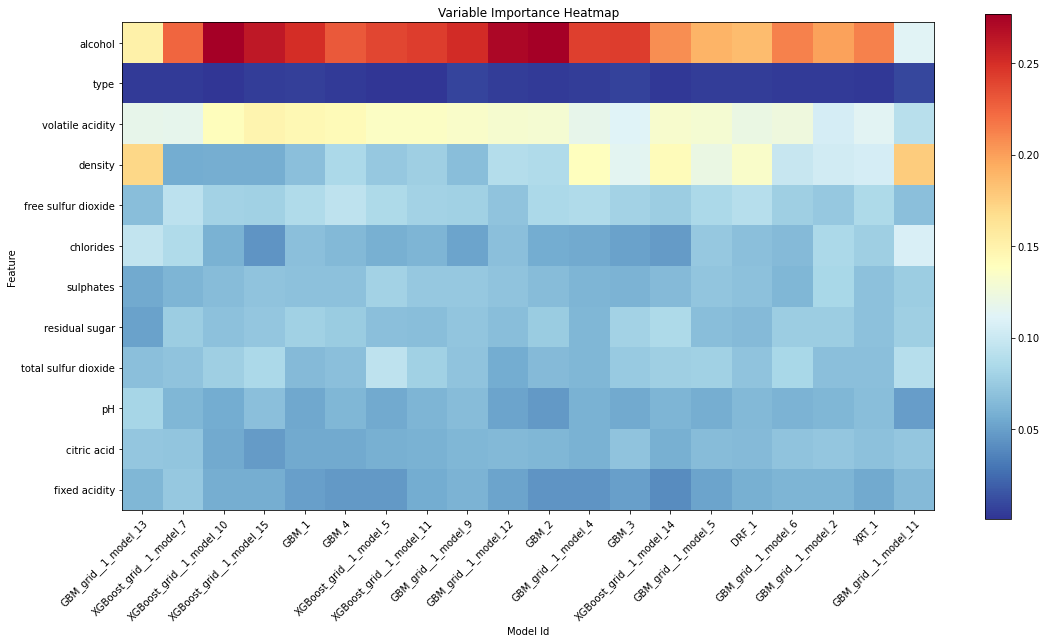

# Model Correlation

> This plot shows the correlation between the predictions of the models. For classification, frequency of identical predictions is used. By default, models are ordered by their similarity (as computed by hierarchical clustering). Interpretable models, such as GAM, GLM, and RuleFit are highlighted using red colored text.

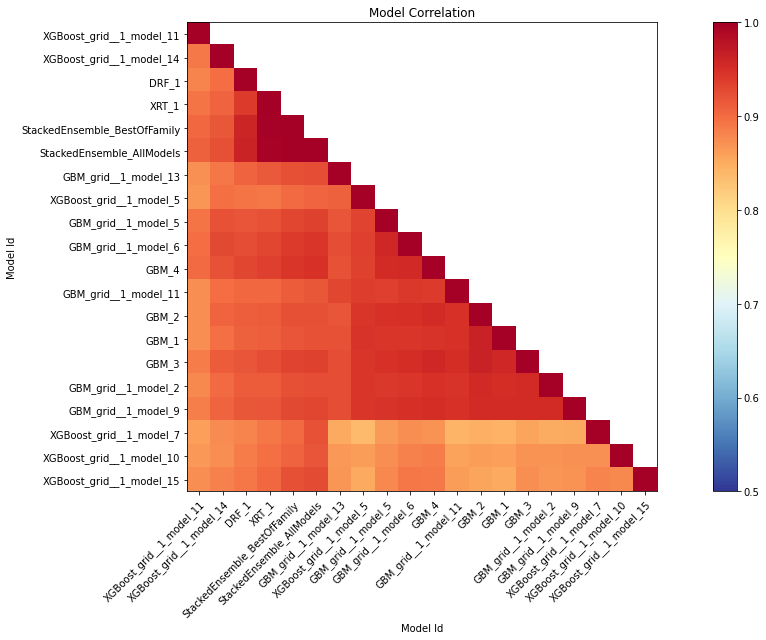

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

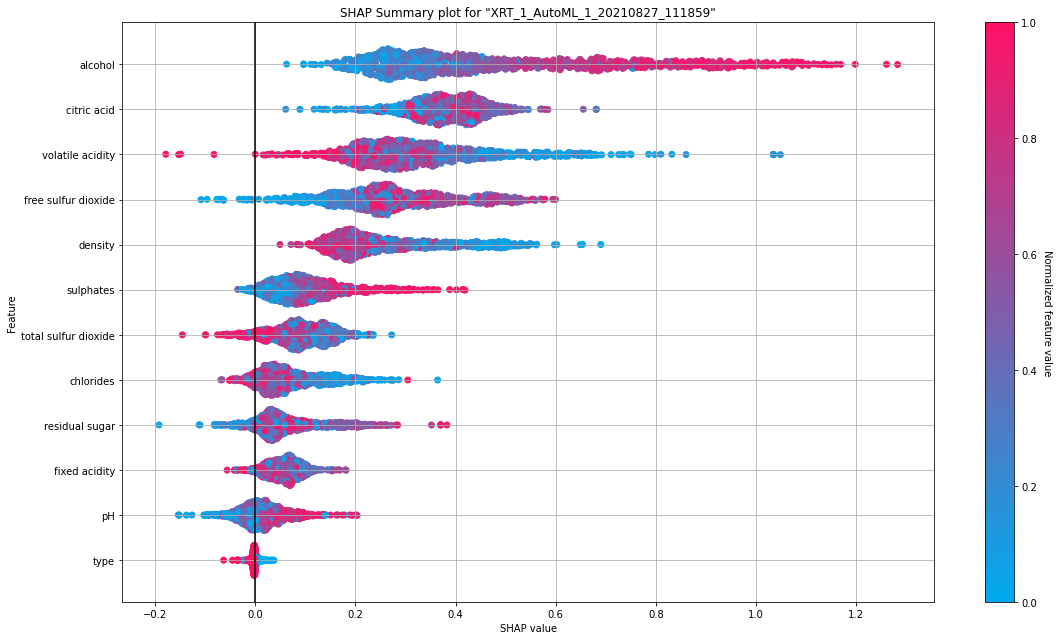

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

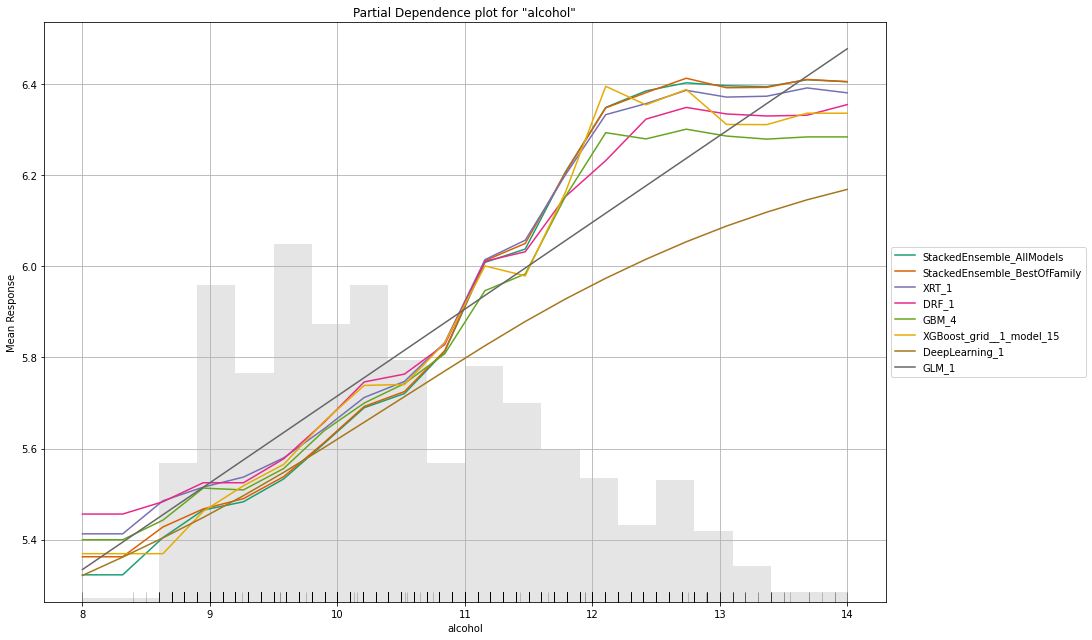

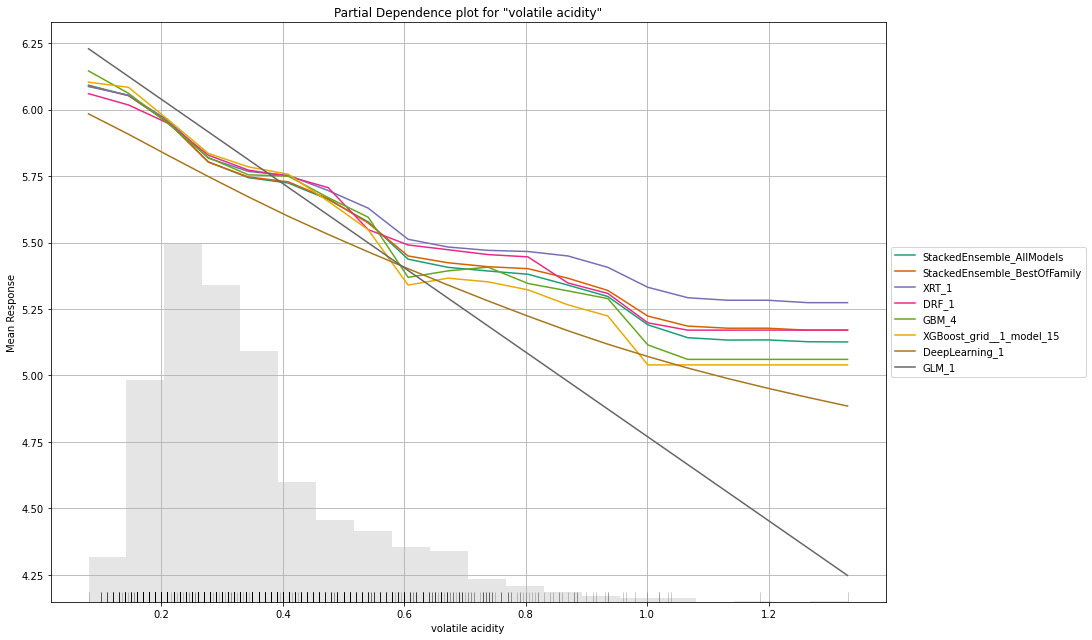

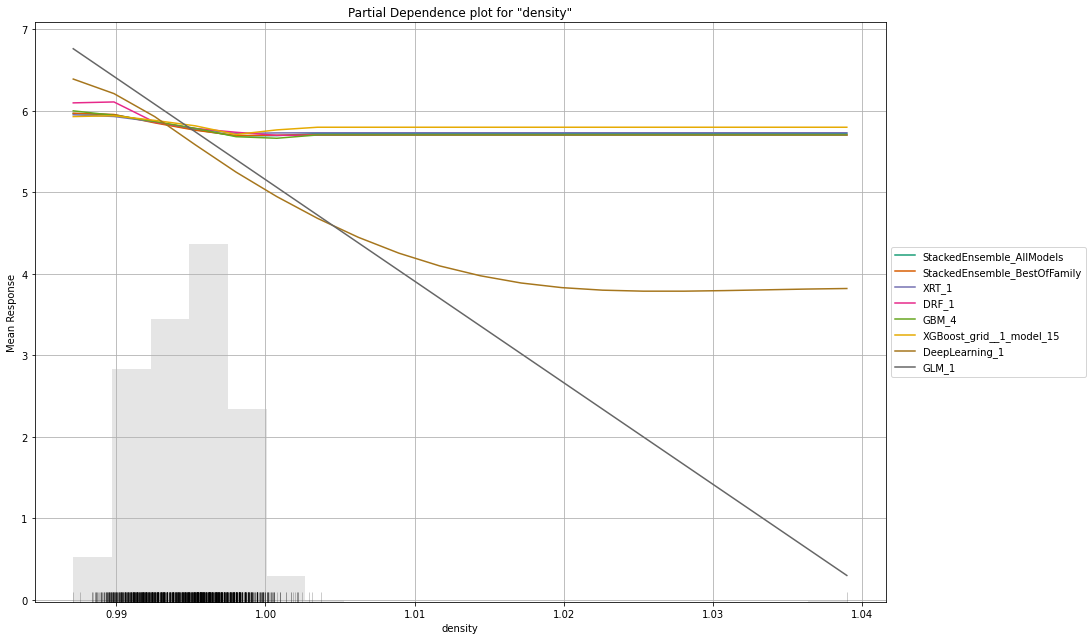

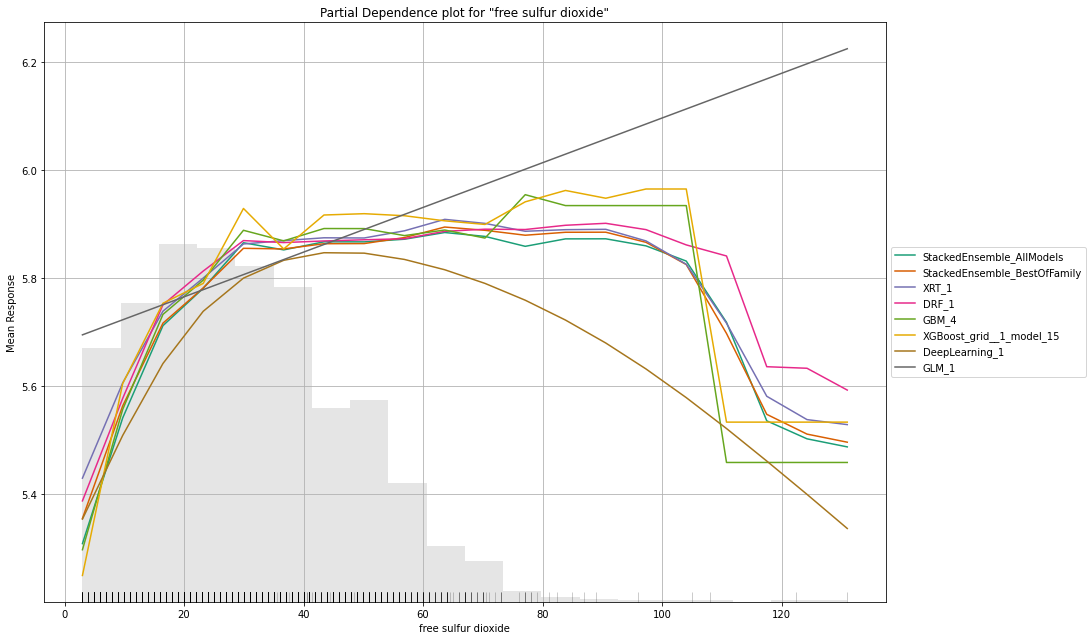

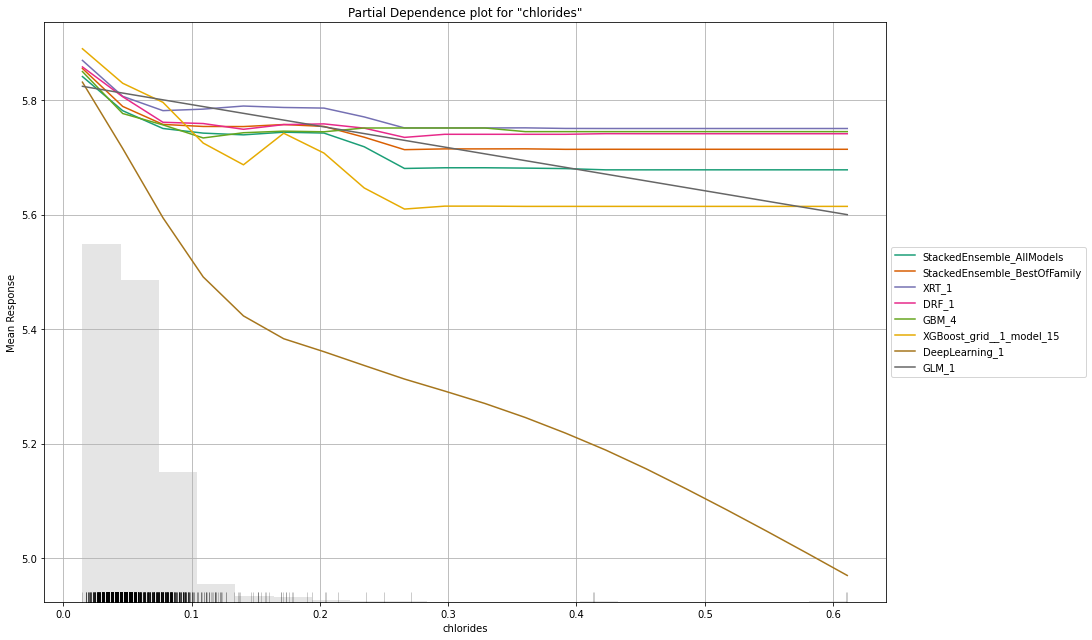

# Individual Conditional Expectation

> An Individual Conditional Expectation (ICE) plot gives a graphical depiction of the marginal effect of a variable on the response. ICE plots are similar to partial dependence plots (PDP); PDP shows the average effect of a feature while ICE plot shows the effect for a single instance. This function will plot the effect for each decile. In contrast to the PDP, ICE plots can provide more insight, especially when there is stronger feature interaction.

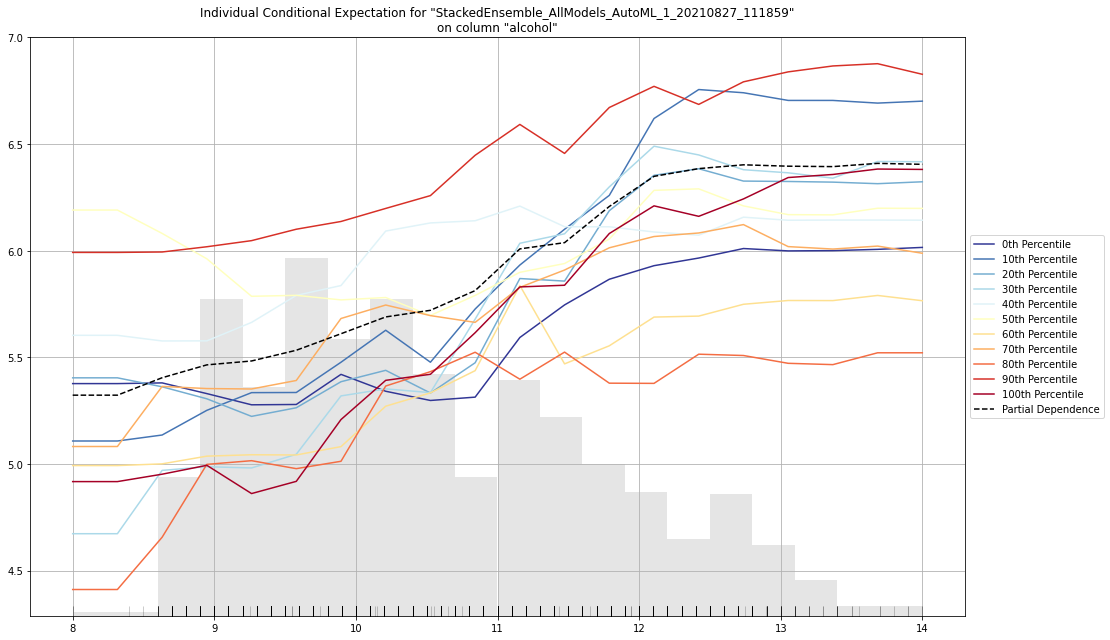

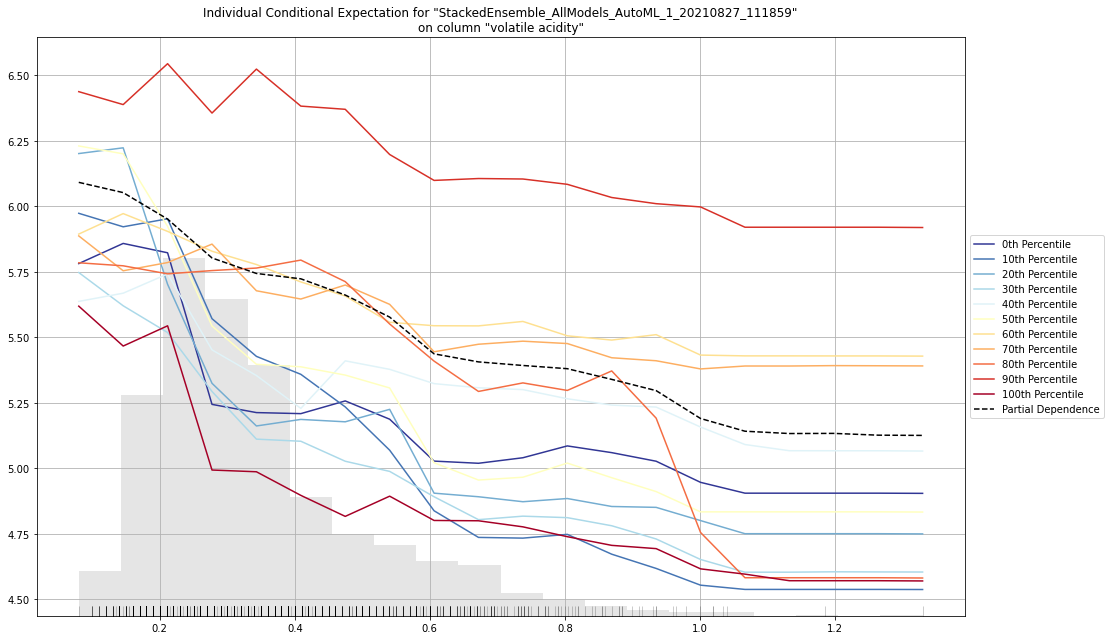

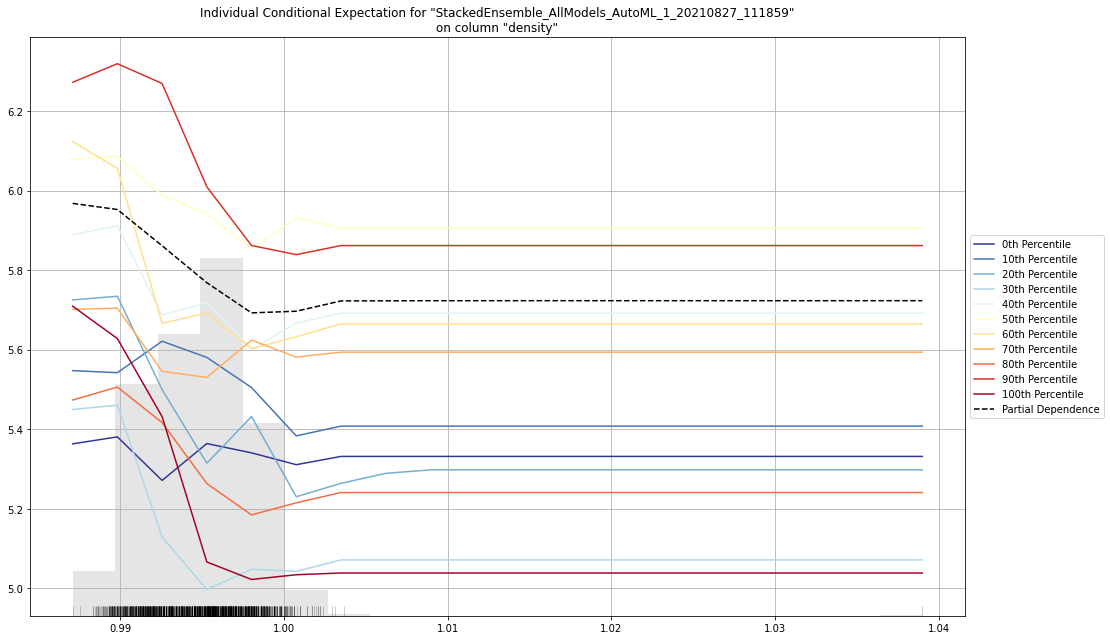

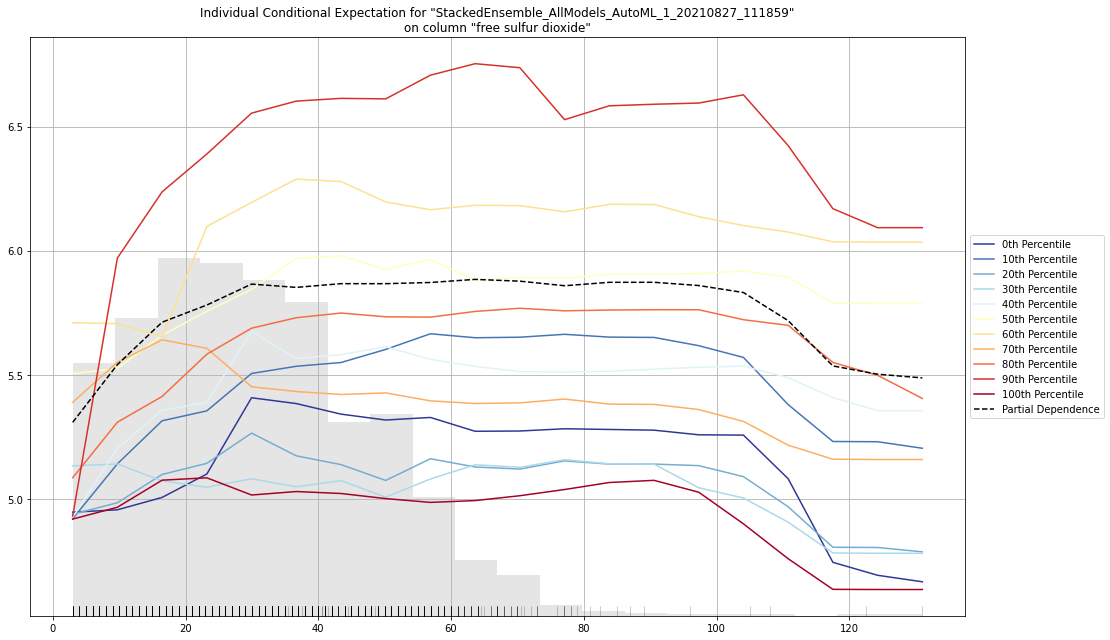

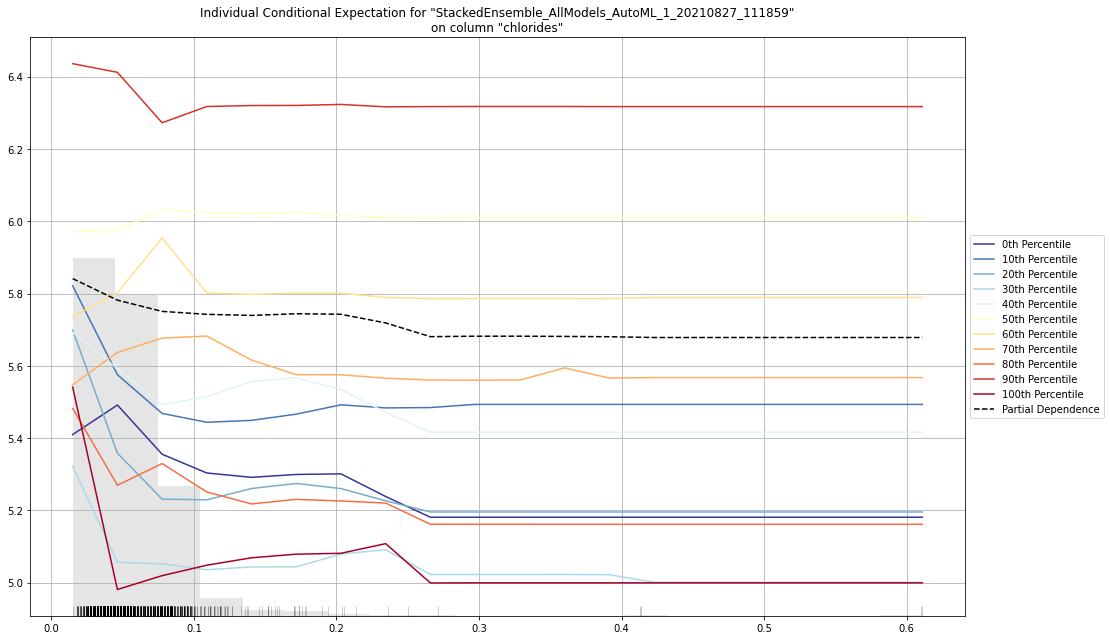

In [5]:
aml.explain(test);

# Leaderboard

> Leaderboard shows models with their metrics and their predictions for a given row. When provided with H2OAutoML object, the leaderboard shows 5-fold cross-validated metrics by default (depending on the H2OAutoML settings), otherwise it shows metrics computed on the frame. At most 20 models are shown by default.

model_id,mean_residual_deviance,rmse,mse,mae,rmsle,training_time_ms,predict_time_per_row_ms,algo,predict
StackedEnsemble_AllModels_AutoML_1_20210827_111859,0.379359,0.615921,0.379359,0.43659,0.0932924,484,0.029982,StackedEnsemble,5.36743
StackedEnsemble_BestOfFamily_AutoML_1_20210827_111859,0.382806,0.618713,0.382806,0.44203,0.0937151,398,0.008975,StackedEnsemble,5.41374
XRT_1_AutoML_1_20210827_111859,0.391362,0.62559,0.391362,0.454756,0.0949069,793,0.003966,DRF,5.41379
DRF_1_AutoML_1_20210827_111859,0.394649,0.628211,0.394649,0.455099,0.095209,452,0.003137,DRF,5.6046
GBM_4_AutoML_1_20210827_111859,0.415845,0.64486,0.415845,0.484437,0.0975089,463,0.005231,GBM,5.31048
GBM_grid__1_AutoML_1_20210827_111859_model_6,0.416076,0.64504,0.416076,0.483094,0.0975168,686,0.006324,GBM,5.34015
GBM_grid__1_AutoML_1_20210827_111859_model_9,0.421898,0.649537,0.421898,0.495109,0.0979614,455,0.0056,GBM,5.79558
GBM_grid__1_AutoML_1_20210827_111859_model_5,0.425136,0.652025,0.425136,0.492624,0.0984345,828,0.008269,GBM,5.22839
GBM_grid__1_AutoML_1_20210827_111859_model_2,0.42584,0.652564,0.42584,0.496592,0.098584,425,0.005447,GBM,5.32125
GBM_3_AutoML_1_20210827_111859,0.428168,0.654346,0.428168,0.497377,0.0989008,416,0.005314,GBM,5.54581


# SHAP Explanation

> SHAP explanation shows contribution of features for a given instance. The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function. H2O implements TreeSHAP which when the features are correlated, can increase contribution of a feature that had no influence on the prediction.

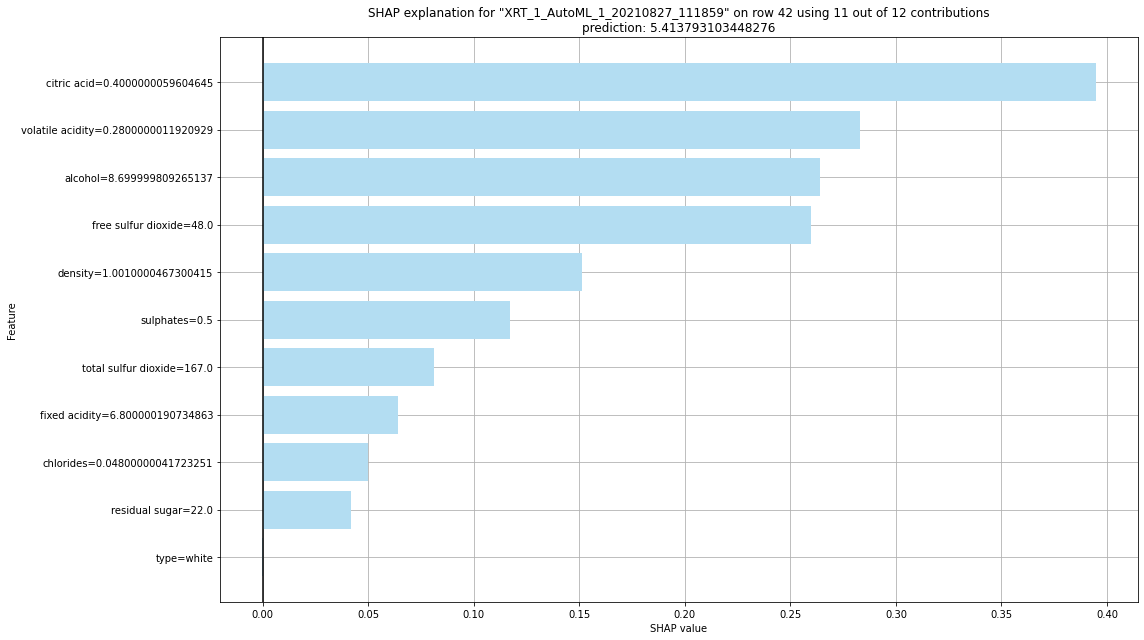

In [6]:
aml.explain_row(test, row_index=42);